Dimension Reduction – PCA 
Case Study -1 (CS 41)
Case Study


Objective:



•	Understand and practice principal component analysis using scikit learn.




Questions:



1.	Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib. [Hint: Explore datasets module from scikit learn]



2.	Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

3.	Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

[Hint: Refer to decomposition module of scikit learn]



4.	Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]



5.	Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.


In [1]:
import matplotlib.pyplot as plot
%matplotlib inline
import pandas as pd
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

In [4]:
print (X.shape)

(1797, 64)


In [5]:
print (y.shape)

(1797,)


In [6]:
print (pd.DataFrame(y).value_counts())

0
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


In [7]:
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


4


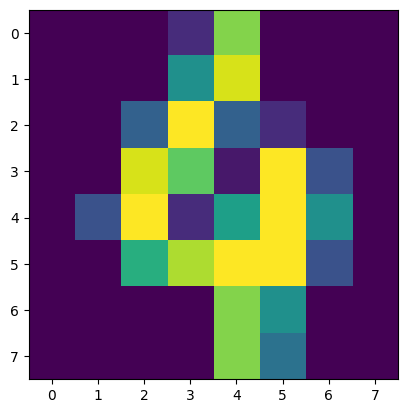

In [9]:
def plot_digit(x,index):
    plot.imshow(x.reshape(8,8))
    print(index)

plot_digit(X[100],y[100])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(1437, 64)


In [12]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)
log_y_predict = lr.predict(X_test)

In [13]:
print (accuracy_score(log_y_predict,y_test))

0.9722222222222222


In [14]:
conf_mat =confusion_matrix(log_y_predict,y_test)
print (conf_mat)

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 1  1  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 28  0  1  2  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  1  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 33]]


In [15]:
print (classification_report(log_y_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       1.00      0.93      0.96        41
           5       0.93      0.88      0.90        32
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        35
           8       0.93      0.96      0.95        28
           9       0.97      1.00      0.99        33

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [16]:
sklearn_pca = PCA(n_components=0.95)
sklearn_pca.fit(X_train)

PCA(n_components=0.95)

In [17]:
X_train_transformed = sklearn_pca.transform(X_train)

In [18]:
print(X_train.shape)
print(X_train_transformed.shape)
print(X_test.shape)

(1437, 64)
(1437, 28)
(360, 64)


In [19]:
X_test_transformed =sklearn_pca.transform(X_test)
print(X_test_transformed.shape)

(360, 28)


In [22]:
pca_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
pca_lr.fit(X_train_transformed,y_train)
pca_y_predict = pca_lr.predict(X_test_transformed)

In [23]:
accuracy = accuracy_score(pca_y_predict ,y_test)
print(accuracy)

0.975


In [24]:
sklearn_pca.explained_variance_

array([176.25219806, 162.27844722, 140.97668344, 103.55187264,
        70.38843868,  59.14843949,  51.1314358 ,  43.73488583,
        40.87599877,  36.77769212,  28.4836322 ,  26.70870056,
        21.96750616,  21.59897219,  18.03292618,  16.65025739,
        15.77968654,  14.90021201,  12.22895905,  11.29792946,
        10.71329183,   9.68812829,   9.19074224,   8.46335199,
         8.45761581,   7.08692941,   6.78470994,   6.09793341])

In [25]:
sklearn_pca.explained_variance_ratio_

array([0.1470014 , 0.13534673, 0.11758021, 0.08636642, 0.05870678,
       0.04933217, 0.04264567, 0.03647665, 0.03409222, 0.03067407,
       0.02375649, 0.02227613, 0.01832178, 0.01801441, 0.01504018,
       0.01388698, 0.01316089, 0.01242737, 0.01019944, 0.00942293,
       0.00893532, 0.00808029, 0.00766545, 0.00705878, 0.00705399,
       0.00591078, 0.00565872, 0.00508592])

In [26]:
print (accuracy_score(pca_y_predict,y_test))

0.975


In [27]:
conf_mat =confusion_matrix(pca_y_predict,y_test)
print (conf_mat)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  1  2  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  1  0  0  0  1 27  0]
 [ 0  1  0  0  0  0  0  0  0 33]]


In [28]:
print (classification_report(pca_y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       1.00      0.97      0.99        39
           5       0.97      0.88      0.92        33
           6       1.00      1.00      1.00        37
           7       0.92      1.00      0.96        34
           8       0.93      0.93      0.93        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



In [29]:
np.where(pca_y_predict != y_test)

(array([108, 126, 173, 174, 248, 249, 267, 321, 348], dtype=int64),)